In [38]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from scipy import stats

%matplotlib inline
from matplotlib.pyplot import xticks

In [39]:
data = pd.read_excel(r"C:\Users\vaide\OneDrive\Desktop\Bank_Personal_Loan_Modelling.xlsx", sheet_name='Data')

In [40]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [41]:
data.shape

(5000, 14)

In [42]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [44]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [45]:
#checking duplicates
sum(data.duplicated(subset = 'ID')) == 0
# No duplicate values

True

In [46]:
# Checking Null values
data.isnull().sum()*100/data.shape[0]
# There are no NULL values in the dataset, hence it is clean.

ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

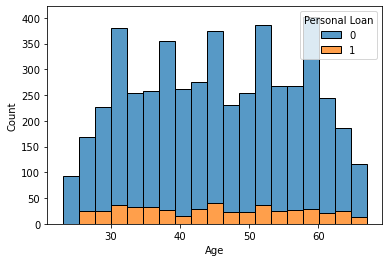

In [53]:
sns.histplot(data=data, x="Age", hue='Personal Loan', multiple="stack")

<AxesSubplot:xlabel='Experience', ylabel='Count'>

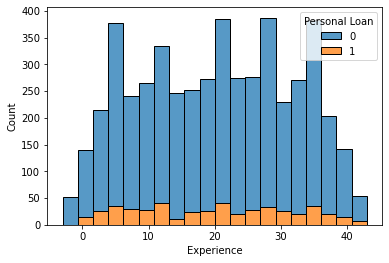

In [54]:
sns.histplot(data=data, x="Experience", hue='Personal Loan', multiple="stack")

<AxesSubplot:xlabel='Income', ylabel='Count'>

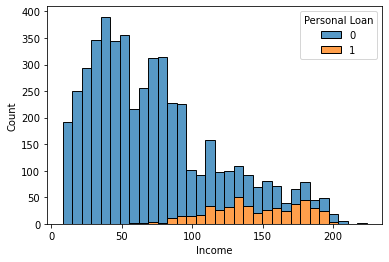

In [55]:
sns.histplot(data=data, x="Income", hue='Personal Loan', multiple="stack")

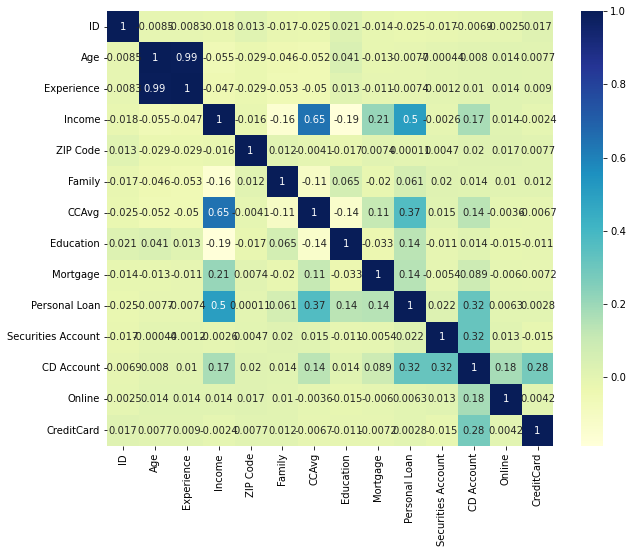

In [47]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [48]:
import statsmodels.api as sm
# Creating Target variable and the independent variables
y_logr=data[['Personal Loan']]
x_logr=data.drop(['Personal Loan','ID'],axis=1)
x_logr = sm.add_constant(x_logr) 
logr_model = sm.Logit(y_logr, x_logr) # Using Logit instead of OLS since it is logistic regression
logr_fit = logr_model.fit()
print(logr_fit.summary())


Optimization terminated successfully.
         Current function value: 0.128434
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4987
Method:                           MLE   Df Model:                           12
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.5938
Time:                        19:33:16   Log-Likelihood:                -642.17
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.8272      4.119     -2.871      0.004     -19.901      -3.753
Age  

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logistic_regression= LogisticRegression()
model=logistic_regression.fit(x_logr,y_logr)
print("Confusion Matrix: \n",confusion_matrix(y_logr, logistic_regression.predict(x_logr)))
accuracy= model.score(x_logr, y_logr)
print("Model Accuracy:", round(accuracy,2)*100, "%")

Confusion Matrix: 
 [[4384  136]
 [ 322  158]]
Model Accuracy: 91.0 %


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_logr, logistic_regression.predict(x_logr)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4520
           1       0.54      0.33      0.41       480

    accuracy                           0.91      5000
   macro avg       0.73      0.65      0.68      5000
weighted avg       0.89      0.91      0.90      5000



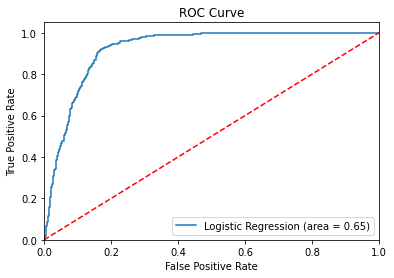

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_logr, model.predict(x_logr))
fpr, tpr, thresholds = roc_curve(y_logr, model.predict_proba(x_logr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()